#Interpolación mediante trazadores(splines)
Un procedimiento alternativo de interpolación además de la interpolación de Lagrange, que consiste en colocar polinomios de grado inferior en subconjuntos de los puntos asociados con datos. Tales polinomios se denominan *trazadores* o *splines*.


#Trazadores cúbicos
El objetivo en los trazadores cúbicos es es obtener un polinomio de tercer grado para cada intervalo entre los nodos:
\begin{equation}
f_i(x)=a_ix^3+b_ix^2+c_ix+d_i
\end{equation}
Así, para $n+1$ puntos asociados con datos ($i=1,2,...,n$) existen $n$ intervalos y, en consecuencia, $4n$ incógnitas a evaluar. Se requieren $4n$ condiciones para evaluar las incógnitas. Éstas son:
1. Los valores de la función deben ser iguales en los nodos interiores ($2n-2$ condiciones).
2. La primera y última función deben pasar a través de los puntos extremos ($2$ condiciones).
3. Las primeras derivadas de los nodos interiores deben ser iguales ($n-1$ condiciones).
4. Las segundas derivadas en los nodos interiores deben ser iguales ($n-1$ condiciones).
5. Las segundas derivadas en los nodos extremos deben ser cero ($2$ condiciones).

Realizando las deducciones correspondientes, la ecuación cúbica para cada intervalo es:
\begin{equation}
f_i(x)=\frac{f_i''(x_{i-1})}{6(x_i-x_{i-1})}(x_i-x)^3+\frac{f_i''(x_i)}{6(x_i-x_{i-1})}(x-x_{i-1})^3+\left[\frac{f(x_{i-1})}{x_i-x_{i-1}}-\frac{f''(x_{i-1})(x_i-x_{i-1})}{6}\right](x_i-x)+\left[\frac{f(x_i)}{x_i-x_{i-1}}-\frac{f''(x_i)(x_i-x_{i-1})}{6}\right](x-x_{i-1})
\end{equation}
Esta ecuación contiene solo dos incógnitas (las segundas derivadas en los extremos en cada intervalo). Las incógnitas se evaluan emppleando la siguiente ecuación:
\begin{equation}
(x_i-x_{i-1})f''(x_{i-1})+2(x_{i+1}-x_{i-1})f''(x_i)+(x_{i+1}-x_i)f''(x_{i+1})=\frac{6}{x_{i+1}-x_i}[f(x_{i+1})-f(x_i)]+\frac{6}{x_i-x_{i-1}}[f(x_{i-1})-f(x_i)]
\end{equation}
Si se escribe esta ecuación para todos los nodos interiores, resultan $n-1$ ecuaciones simultáneas con $n-1$ incógnitas (recuerde que las segundas derivadas en los nodos interiores es cero).

#Ejemplo:
Profundidad de la ternoclina del lago Platte.

In [2]:
#Código hecho por: Joel Alejandro García Paredes
T=[22.8,22.8,22.8,20.6,13.9,11.7,11.1,11.1] #Temperatura en °C
z=[0,2.3,4.9,9.1,13.7,18.3,22.9,27.2] #profundidad en m

x0=z[0]
x1=z[4]
x2=z[5]
x3=z[7]
T0=T[0]
T4=T[4]
T5=T[5]
T7=T[7]

#Primero se encuentran las segundas derivadas de los nodos interiores
#Metodo de Thomas
e2=2.6
e3=4.2
e4=4.6
e5=4.6
e6=4.6
f1=22.54
f2=13.6
f3=17.6
f4=18.4
f5=27.6
f6=17.8
g1=2.6
g2=4.2
g3=4.6
g4=4.6
g5=4.6
A=[[f1,g1,0,0,0,0],
   [e2,f2,g2,0,0,0],
   [0,e3,f3,g3,0,0],
   [0,0,e4,f4,g4,0],
   [0,0,0,e5,f5,g5],
   [0,0,0,0,e6,f6]]
n=len(A)
e=[0,e2,e3,e4,e5,e6]
f=[f1,f2,f3,f4,f5,f6]
g=[g1,g2,g3,g4,g5,0]

for i in range(1,n):
 e[i]=e[i]/f[i-1]
 f[i]=f[i]-e[i]*g[i-1]

e2=e[1]
e3=e[2]
e4=e[3]
e5=e[4]
e6=e[5]
f1=f[0]
f2=f[1]
f3=f[2]
f4=f[3]
f5=f[4]
f6=f[5]

A=[[f1,g1,0,0,0,0],
   [e2,f2,g2,0,0,0],
   [0,e3,f3,g3,0,0],
   [0,0,e4,f4,g4,0],
   [0,0,0,e5,f5,g5],
   [0,0,0,0,e6,f6]]

L=[[1,0,0,0,0,0],
   [e2,1,0,0,0,0],
   [0,e3,1,0,0,0],
   [0,0,e4,1,0,0],
   [0,0,0,e5,1,0],
   [0,0,0,0,e6,1]]

U=[[f1,g1,0,0,0,0],
   [0,f2,g2,0,0,0],
   [0,0,f3,g3,0,0],
   [0,0,0,f4,g4,0],
   [0,0,0,0,f5,g5],
   [0,0,0,0,0,f6]]

b1=0
b2=16.43
b3=-5.6
b4=5.87
b5=2.09
b6=0.78

d1=b1
d2=b2-d1*L[1][0]
d3=b3-d2*L[2][1]
d4=b4-d3*L[3][2]
d5=b5-d4*L[4][3]
d6=b6-d5*L[5][4]
D=[d1,d2,d3,d4,d5,d6]

T26=d6/U[5][5]
T25=(d5-T26*U[4][5])/U[4][4]
T24=(d4-T25*U[3][4])/U[3][3]
T23=(d3-T24*U[2][3])/U[2][2]
T22=(d2-T23*U[1][2])/U[1][1]
T21=(d1-T22*U[0][1])/U[0][0]

In [3]:
#Calculando las funciones
z1=z[1]
T0=T[0]
T1=T[1]

a=T21/(6*(z1-x0))
c1=T0/(z1-x0)
c2=T1/(z1-x0)-T21*(z1-x0)/6

def g1(x):
  return a*(x-x0)**3+c1*(z1-x)+c2*(x-x0)

z2=z[2]
T2=T[2]
a1=T21/(6*(z2-z1))
a2=T22/(6*(z2-z1))
c12=T1/(z2-z1)-T21*(z2-z1)/6
c22=T2/(z2-z1)-T22*(z2-z1)/6

def g2(x):
  return a1*(z2-x)**3+a2*(x-z1)**3+c12*(z2-x)+c22*(x-z1)

z3=z[3]
T3=T[3]
a13=T22/(6*(z3-z2))
a23=T23/(6*(z3-z2))
c13=T2/(z3-z2)-T22*(z3-z2)/6
c23=T3/(z3-z2)-T23*(z3-z2)/6

def g3(x):
  return a13*(z3-x)**3+a23*(x-z2)**3+c13*(z3-x)+c23*(x-z2)

z4=z[4]
T4=T[4]
a14=T24/(6*(z4-z3))
a24=T24/(6*(z4-z3))
c14=T3/(z4-z3)-T23*(z4-z3)/6
c24=T4/(z4-z3)-T24*(z4-z3)/6

def g4(x):
  return a14*(z4-x)**3+a24*(x-z3)**3+c14*(z4-x)+c24*(x-z3)

z5=z[5]
T5=T[5]
a15=T24/(6*(z5-z4))
a25=T25/(6*(z5-z4))
c15=T4/(z5-z4)-T24*(z5-z4)/6
c25=T5/(z5-z4)-T25*(z5-z4)/6

def g5(x):
  return a15*(z5-x)**3+a25*(x-z4)**3+c15*(z5-x)+c25*(x-z4)

z6=z[6]
T6=T[6]
a16=T25/(6*(z6-z5))
a26=T26/(6*(z6-z5))
c16=T5/(z6-z5)-T25*(z6-z5)/6
c26=T6/(z6-z5)-T26*(z6-z5)/6
def g6(x):
  return a16*(z6-x)**3+a26*(x-z5)**3+c16*(z6-x)+c26*(x-z5)

z7=z[7]
T7=T[7]
a17=T26/(6*(z7-z6))
c17=T6/(z7-z6)-T26*(z7-z6)/6
c27=T7/(z7-z6)

def g7(x):
  return a17*(z7-x)**3+c17*(z7-x)+c27*(x-z6)

Text(0.5, 1.0, 'z vs T')

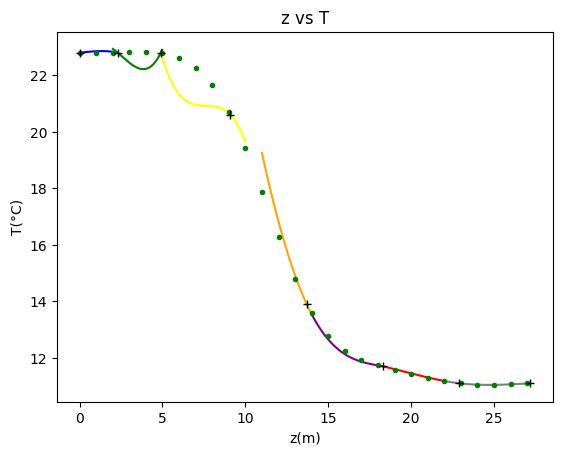

In [8]:
#Graficas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
Tinterpolada=[22.8,22.7907,22.7944,22.8203,22.8374,22.7909,22.6229,22.2665,
             21.6531,20.7144,19.4118,17.8691,16.2646,14.7766,13.5825,12.7652,
             12.2483,11.94,11.7484,11.5876,11.4316,11.2905,11.1745,11.0938,
             11.0543,11.048,11.0646,11.0936]

x1=np.arange(0,2,0.01)
y1=g1(x1)
x2=np.arange(2.01,4.98,0.01)
y2=g2(x2)
x3=np.arange(4.99,10,0.01)
y3=g3(x3)
x4=np.arange(11,14,0.01)
y4=g4(x4)
x5=np.arange(14.01,18,0.01)
y5=g5(x5)
x6=np.arange(18.01,22,0.01)
y6=g6(x6)
x7=np.arange(22.01,27,0.01)
y7=g7(x7)

plt.plot(x1,y1,color='blue') #primera función
plt.plot(x2,y2,color='green') #segunda función
plt.plot(x3,y3,color='yellow') #tercera función
plt.plot(x4,y4,color='orange') #cuarta función
plt.plot(x5,y5,color='purple') #quinta función
plt.plot(x6,y6,color='red') #sexta función
plt.plot(x7,y7,color='gray') #séptima función

for i in range(0,28):
  plt.plot(i,Tinterpolada[i],'.',color='green') #datos interpolados del libro
for i in range(0,8):
  plt.plot(z[i],T[i],'+',color='black') #datos de las mediciones
plt.xlabel('z(m)')
plt.ylabel('T(°C)')
plt.title('z vs T')
# debido a que las medidas originales son pocas, las dos curvas de interpolacion
#se ajustan, sin embargo, la interpolacion reportada en el libro es mas consistente
#que la calculada

#Usando librería

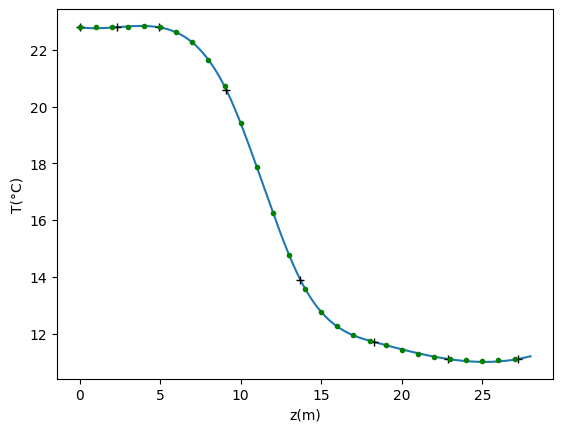

In [14]:
from scipy.interpolate import CubicSpline
T=[22.8,22.8,22.8,20.6,13.9,11.7,11.1,11.1] #Temperatura en °C
z=[0,2.3,4.9,9.1,13.7,18.3,22.9,27.2] #profundidad en m
cs=CubicSpline(z,T)

z1=np.arange(0,28,0.01)
T1=cs(z1)
plt.plot(z1,T1)
for i in range(0,8):
  plt.plot(z[i],T[i],'+',color='black')
for i in range(0,28):
  plt.plot(i,Tinterpolada[i],'.',color='green')
plt.xlabel('z(m)')
plt.ylabel('T(°C)')
plt.show()